In [248]:
import re
import urllib.request
#stopwordlist = urllib.request.urlopen('http://www.textfixer.com/resources/common-english-words.txt').read()
#for line in stopwordlist:
#    stopword = line.split(",")

In [249]:
text1 = open("state_of_union.txt")
text = text1.read()
text_list=text.split("***")
text1.close()

In [250]:
title = text_list[0].split("\n ")[1:]
#title = text_list[0]
#print (title)

In [251]:
for i in range(len(title)):
    title[i] = title[i].replace("\r\n","")

In [252]:
content=[]
for article in text_list[1:]:
    temp_content = article.replace("\r\n\r\n"," ")
    temp_content = temp_content.replace("\r\n"," ")
    temp_content = re.split(r'\d{4}',temp_content,1)[1]
    content.append(temp_content)

In [253]:
len(title)

224

In [254]:
title[0]

' George Washington, State of the Union Address, January 8, 1790'

In [255]:
#split up title into president, month, day and year
title1 = []
for i in range(len(title)):
    temp_title = title[i].split(",")
    temp_title = [temp_title[0], temp_title[2], temp_title[3]]
    title1.append(temp_title)
print(title1[200:223])

[[' William J. Clinton', ' January 25', ' 1994'], [' William J. Clinton', ' January 24', ' 1995'], [' William J. Clinton', ' January 23', ' 1996'], [' William J. Clinton', ' February 4', ' 1997'], [' William J. Clinton', ' January 27', ' 1998'], [' William J. Clinton', ' January 19', ' 1999'], [' William J. Clinton', ' January 27', ' 2000'], [' George W. Bush', ' February 27', ' 2001'], [' George W. Bush', ' September 20', ' 2001'], [' George W. Bush', ' January 29', ' 2002'], [' George W. Bush', ' January 28', ' 2003'], [' George W. Bush', ' January 20', ' 2004'], [' George W. Bush', ' February 2', ' 2005'], [' George W. Bush', ' January 31', ' 2006\n'], [' George W. Bush', ' January 23', ' 2007'], [' George W. Bush', ' January 28', ' 2008\n\n'], [' Barack Obama', ' February 24', ' 2009'], [' Barack Obama', ' January 27', ' 2010'], [' Barack Obama', ' January 25', ' 2011'], [' Barack Obama', ' January 24', ' 2012'], [' Barack Obama', ' February 12', ' 2013'], [' Barack Obama', ' Janua

In [256]:
len(content)

224

In [257]:
#Count of words trend:
length=[]
for article in content:
    article = re.sub(r'[^\w]', ' ', article)
    article = article.split()
    length.append(len(article))

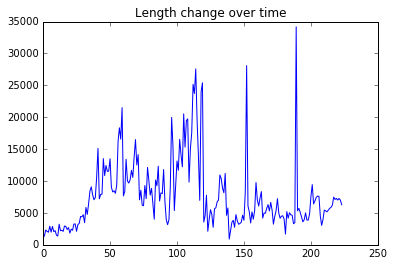

In [258]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = range(len(length))
y = np.array(length)
plt.title("Length change over time")
plt.plot(x,y);

{' October 25': 1, ' November 11': 1, ' December 12': 1, ' December 9': 2, ' November 5': 1, ' January 29': 2, ' November 6': 1, ' November 8': 2, ' November 22': 1, ' January 4': 4, ' December 19': 1, ' February 2': 3, ' November 14': 1, ' January 16': 1, ' January 11': 2, ' December 8': 14, ' February 4': 2, ' January 28': 4, ' December 15': 1, ' January 10': 2, ' January 8': 3, ' December 31': 1, ' January 5': 2, ' December 3': 23, ' January 17': 1, ' January 14': 2, ' January 30': 2, ' October 17': 1, ' January 20': 3, ' January 31': 2, ' December 6': 21, ' January 19': 3, ' January 3': 4, ' November 29': 1, ' December 4': 10, ' January 9': 3, ' January 24': 2, ' February 24': 1, ' December 2': 15, ' February 27': 1, ' October 27': 1, ' January 23': 2, ' December 7': 14, ' January 26': 1, ' November 19': 1, ' September 20': 2, ' December 5': 15, ' January 21': 2, ' November 16': 1, ' January 25': 6, ' December 1': 6, ' January 27': 4, ' November 4': 1, ' February 6': 1, ' January 1

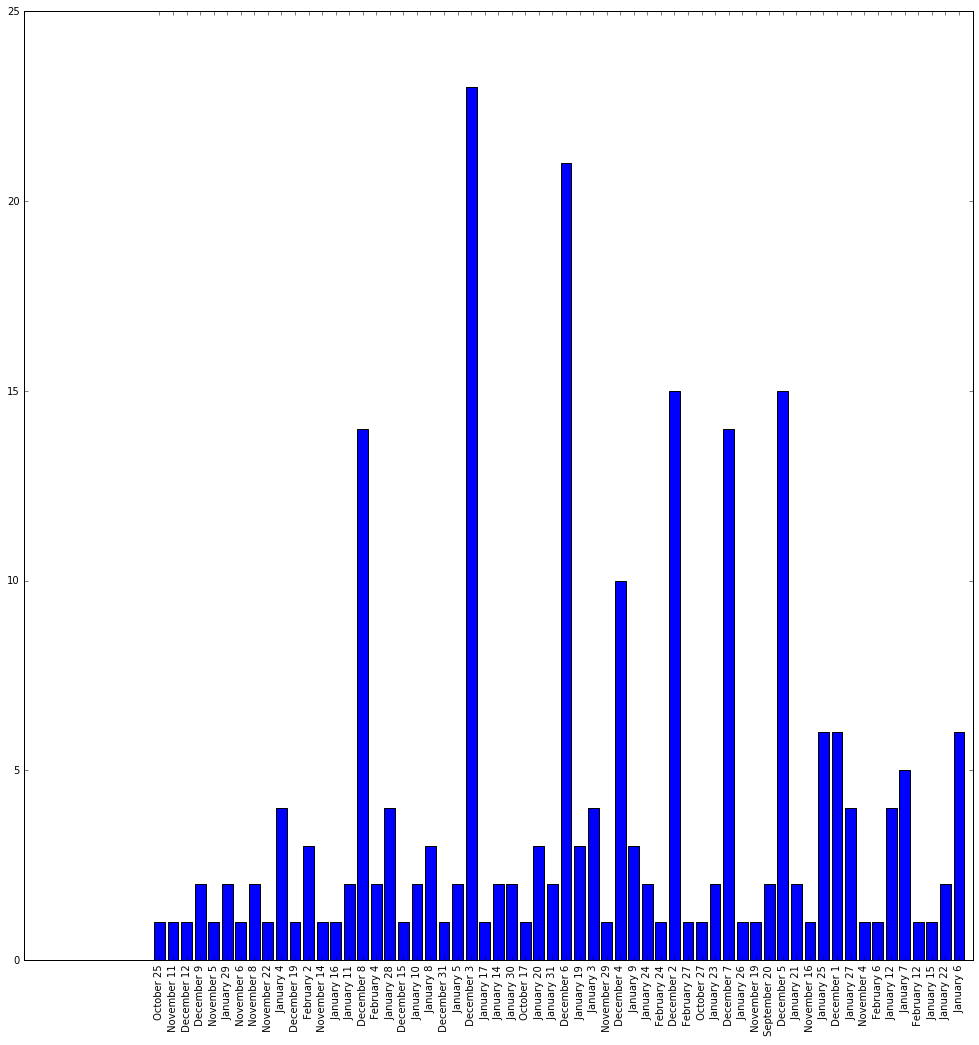

In [259]:
#graph dates of speeches
date_count = {}
for i in title1:
    date = i[1]
    if date_count:
        if date in date_count:   
            date_count[date] = date_count[date] + 1
        else:
            date_count[date] = 1
    else:
        date_count[date] = 1
print (date_count)


from matplotlib import *

plt.figure(figsize=(17,17))

plt.bar(range(len(date_count)), date_count.values(), align='center')
plt.xticks(range(len(date_count)), date_count.keys(), rotation = 'vertical')

plt.show()


{'Latvia': 1, 'Cuba': 74, 'Barbados': 1, 'Montenegro': 2, 'Uganda': 1, 'Bahrain': 2, 'Congo': 6, 'Brazil': 61, 'Armenia': 6, 'Sierra Leone': 2, 'Honduras': 20, 'Jamaica': 3, 'Belgium': 37, 'Tunisia': 5, 'Haiti': 14, 'Switzerland': 14, 'Thailand': 3, 'Luxembourg': 1, 'India': 139, 'Yemen': 5, 'Zimbabwe': 3, 'Canada': 53, 'Lebanon': 8, 'Afghanistan': 23, 'Lithuania': 2, 'Bahamas': 3, 'Jordan': 6, 'Pakistan': 19, 'Togo': 1, 'Cambodia': 3, 'Panama': 43, 'Cyprus': 4, 'Japan': 82, 'Namibia': 2, 'Solomon Islands': 1, 'Angola': 4, 'Indonesia': 7, 'Mali': 7, 'Kuwait': 4, 'Poland': 12, 'Bulgaria': 9, 'Egypt': 26, 'Spain': 89, 'Peru': 50, 'Nigeria': 4, 'South Africa': 4, 'Ireland': 9, 'Kosovo': 3, 'Denmark': 38, 'Algeria': 2, 'Austria': 46, 'Netherlands': 32, 'Rwanda': 1, 'Singapore': 2, 'Albania': 1, 'Belarus': 3, 'United States': 216, 'Antarctica': 2, 'Cape Verde': 1, 'Tonga': 1, 'Northern Mariana Islands': 1, 'Chad': 1, 'Costa Rica': 17, 'United Kingdom': 7, 'Greece': 30, 'Ghana': 1, 'Venezuel

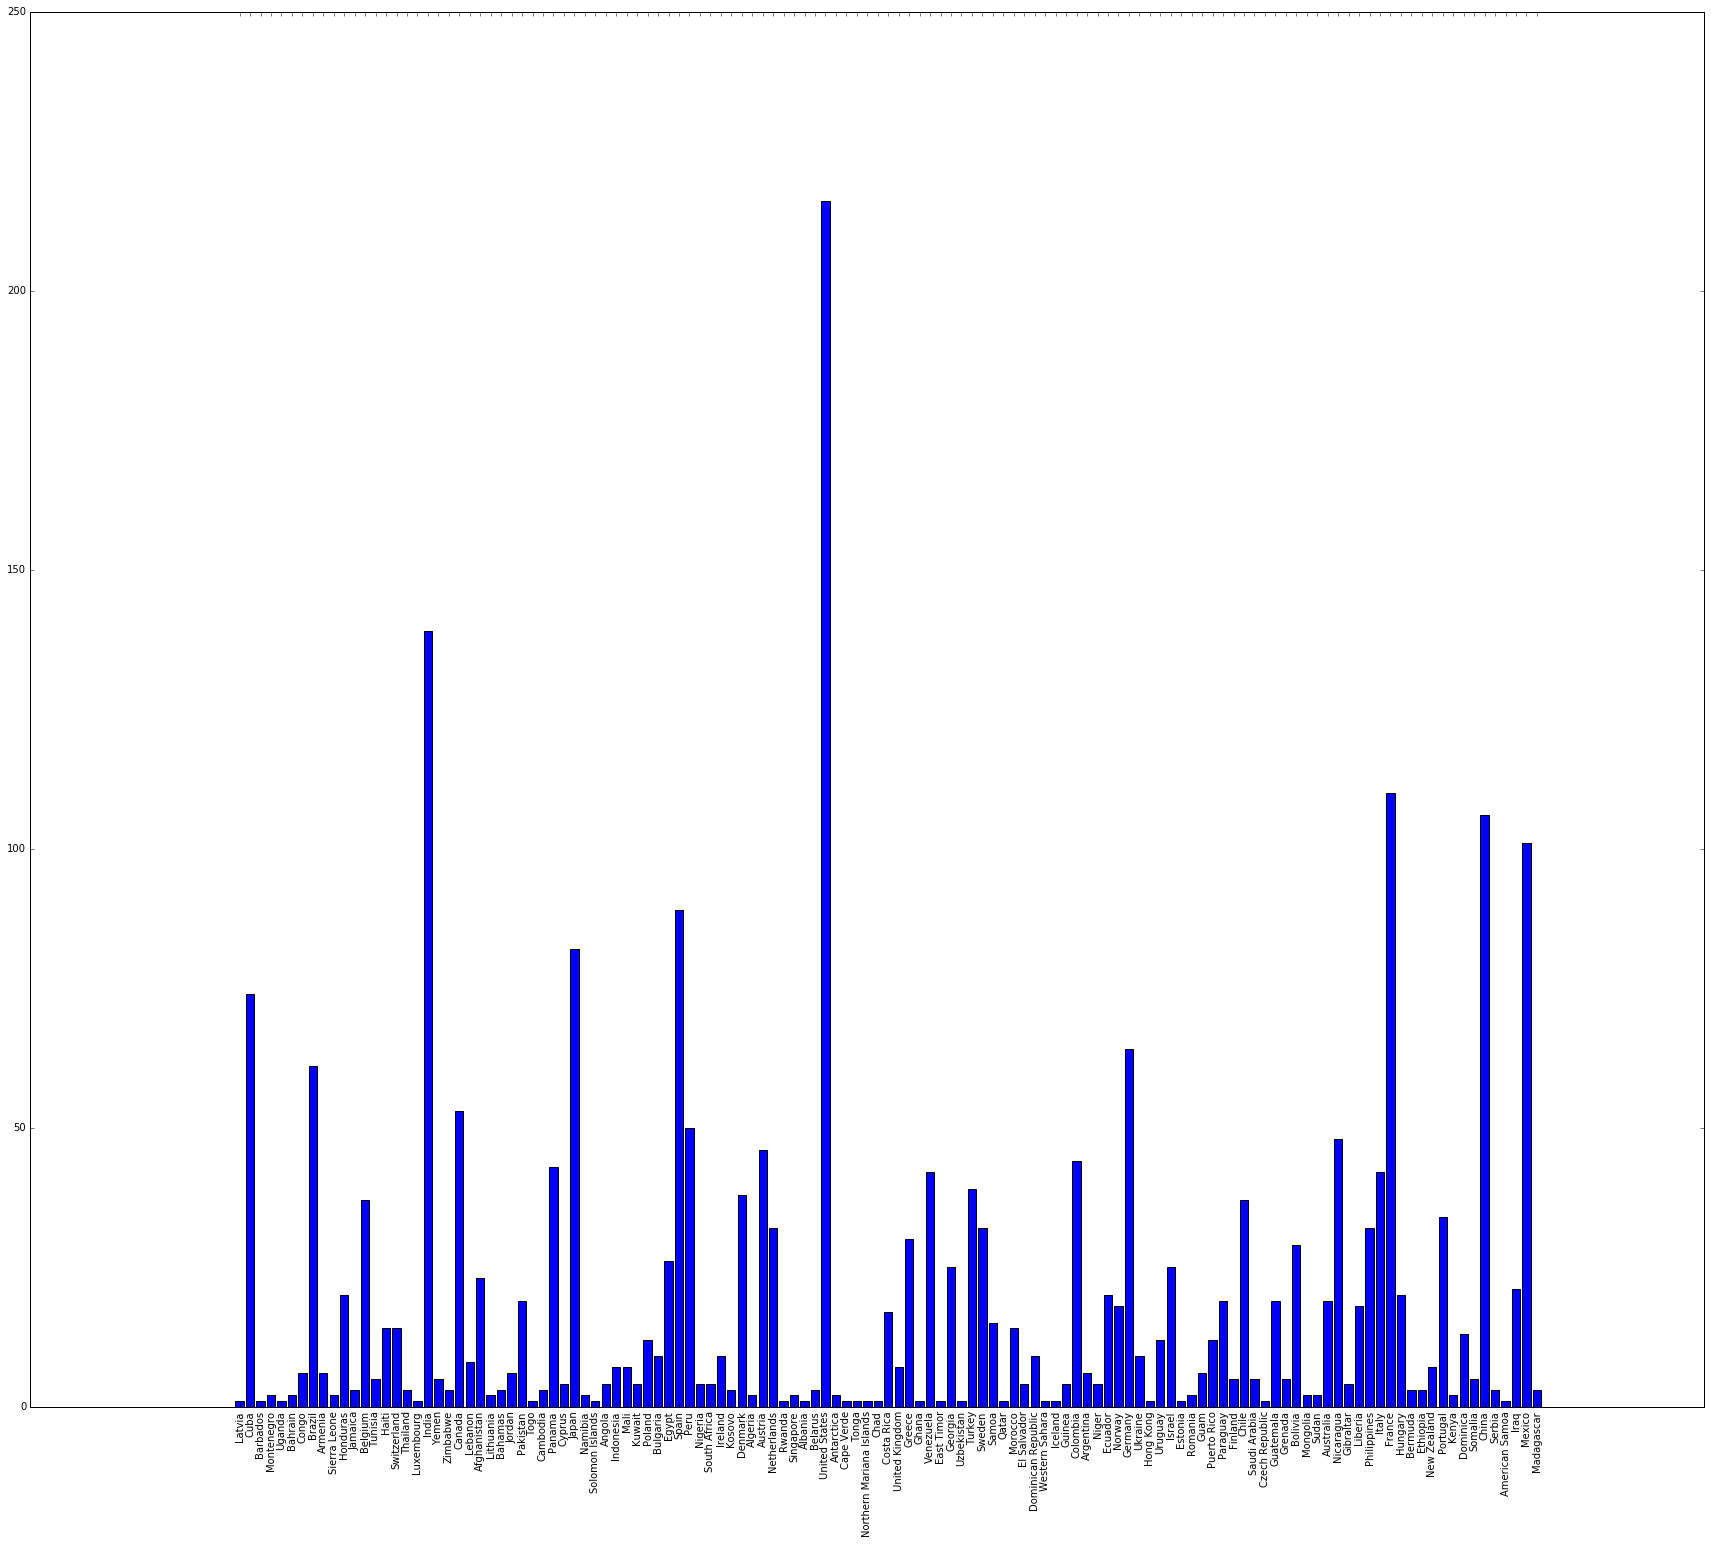

In [260]:
#something with countries mentioned
countries1 = open("countries.txt", "r")
countries = countries1.read()
countries1.close()
countries = countries.split("\n")
country_names = []
for line in countries:
    temp_line = line.split("|")
    country_names.append(temp_line[1])


country_mention_count = {}    
for country in country_names:
    for speech in content:
        if country in speech:
            if country in country_mention_count:
                country_mention_count[country] = country_mention_count[country] + 1
            else:
                country_mention_count[country] = 1
print (country_mention_count)
            
    
    
plt.figure(figsize=(30,25))

plt.bar(range(len(country_mention_count)), country_mention_count.values(), align='center')
plt.xticks(range(len(country_mention_count)), country_mention_count.keys(), rotation = 'vertical')

plt.show()